In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import time
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

random.seed(2019)

# Plot learning curve

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
        
    """
    #import matplotlib.pyplot as plt
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=18)
    plt.ylabel("Score", fontsize=18)
    plt.xticks(fontsize = 16) 
    plt.yticks(fontsize = 16) 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best", fontsize=18)
    return plt

# Loading dataset

In [4]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

print "Count of real label:"
print(wine['quality'].value_counts())

#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = np.random.permutation(wine['quality'])
print "Count of permutated label:"
print(y.sum())

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2019)

#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Count of real label:
0    1382
1     217
Name: quality, dtype: int64
Count of permutated label:
217


# Decision Tree

DT Default parameter: 
Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       269
          1       0.20      0.20      0.20        51

avg / total       0.74      0.75      0.75       320



Accuracy Score:
0.746875


Confusion Table:
[[229  40]
 [ 41  10]]


Wall Clock Time:
(0.010955095291137695, 'seconds')




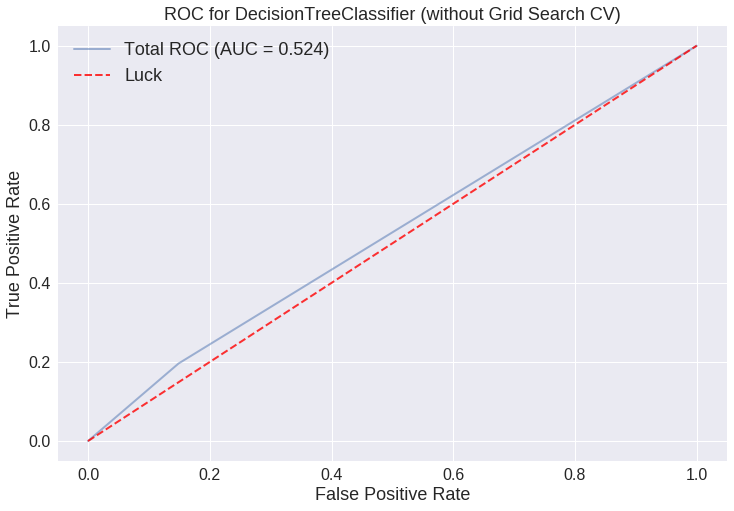

In [5]:
t0 = time.time()
DT = DecisionTreeClassifier(random_state=2019)
DT.fit(X_train, y_train)
pred_DT = DT.predict(X_test)

#Let's see how our model performed
print "DT Default parameter: "
print "Classification Report:"
print(classification_report(y_test, pred_DT))
print "\n"
print "Accuracy Score:"
print(accuracy_score(y_test, pred_DT))
print "\n"
print "Confusion Table:"
print(confusion_matrix(y_test, pred_DT))
print "\n"
print "Wall Clock Time:"
print(time.time() - t0, "seconds")
print "\n"

fpr, tpr, thresholds = roc_curve(y_test, pred_DT)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for DecisionTreeClassifier (without Grid Search CV)', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.show()
plt.savefig("Dataset1.DecisionTreeClassifier.Default.Parameter_ROC.png")

In [10]:
#Finding best parameters for our DT model
param = {
    'max_depth': np.linspace(1, 20, 20, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    #'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'max_features': list(range(1,X_train.shape[1]))
}
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_DT.fit(X_train, y_train)
print(grid_DT.best_params_)

{'max_features': 1, 'min_samples_split': 0.1, 'max_depth': 1.0}


In [6]:
t0 = time.time()
#DT_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
DT_optimized = DecisionTreeClassifier(max_depth=1, max_features=1, min_samples_split=0.1, random_state=2019)
#DT_optimized = DecisionTreeClassifier(max_depth=5)
DT_optimized.fit(X_train, y_train)
pred_DT_optimized = DT_optimized.predict(X_test)
print(classification_report(y_test, pred_DT_optimized))
print(accuracy_score(y_test, pred_DT_optimized))
print(confusion_matrix(y_test, pred_DT_optimized))
print(time.time() - t0, "seconds")

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.0033800601959228516, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


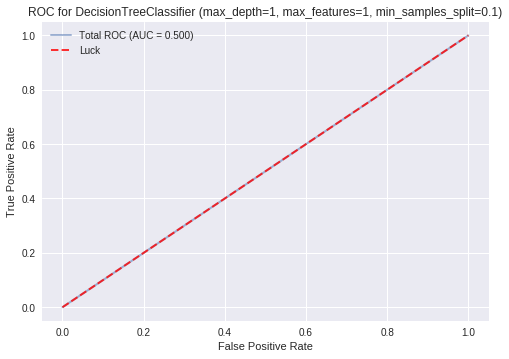

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, pred_DT_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for DecisionTreeClassifier (max_depth=1, max_features=1, min_samples_split=0.1)')
plt.legend(loc="best")
plt.show()

In [13]:
#Finding best parameters for our DT model
param = {
    'max_depth': np.linspace(1, 20, 20, endpoint=True)
    #'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    #'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    #'max_features': list(range(1,X_train.shape[1]))
}
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_DT.fit(X_train, y_train)
print(grid_DT.best_params_)

{'max_depth': 1.0}


In [9]:
t0 = time.time()
#DT_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
DT_optimized = DecisionTreeClassifier(max_depth=1, random_state=2019)
#DT_optimized = DecisionTreeClassifier(max_depth=5)
DT_optimized.fit(X_train, y_train)
pred_DT_optimized = DT_optimized.predict(X_test)
print(classification_report(y_test, pred_DT_optimized))
print(accuracy_score(y_test, pred_DT_optimized))
print(confusion_matrix(y_test, pred_DT_optimized))
print(time.time() - t0, "seconds")

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.007606029510498047, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


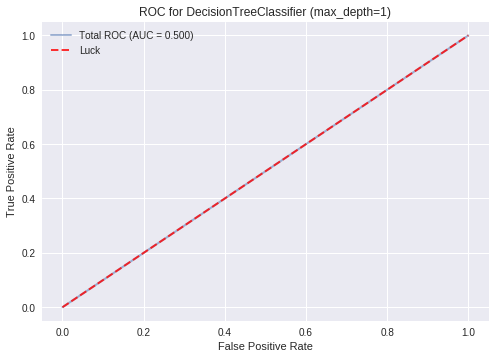

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, pred_DT_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for DecisionTreeClassifier (max_depth=1)')
plt.legend(loc="best")
plt.show()

In [16]:
#Finding best parameters for our DT model
param = {
    #'max_depth': np.linspace(1, 20, 20, endpoint=True)
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
    #'max_features': list(range(1,X_train.shape[1]))
}
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_DT.fit(X_train, y_train)
print(grid_DT.best_params_)

{'min_samples_split': 1.0}


In [18]:
t0 = time.time()
#DT_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
DT_optimized = DecisionTreeClassifier(min_samples_split=1.0, random_state=2019)
#DT_optimized = DecisionTreeClassifier(max_depth=5)
DT_optimized.fit(X_train, y_train)
pred_DT_optimized = DT_optimized.predict(X_test)
print(classification_report(y_test, pred_DT_optimized))
print(accuracy_score(y_test, pred_DT_optimized))
print(confusion_matrix(y_test, pred_DT_optimized))
print(time.time() - t0, "seconds")

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.003407001495361328, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


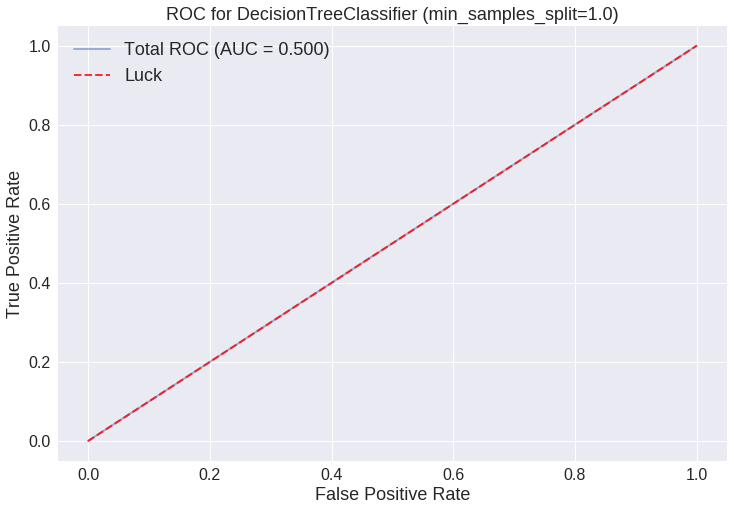

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, pred_DT_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for DecisionTreeClassifier (min_samples_split=1.0)', fontsize = 18)
plt.show()

In [19]:
#Finding best parameters for our DT model
param = {
    #'max_depth': np.linspace(1, 20, 20, endpoint=True)
    #'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
    'max_features': list(range(1,X_train.shape[1]))
}
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_DT.fit(X_train, y_train)
print(grid_DT.best_params_)
#print(grid_DT.cv_results_)

{'max_features': 7}


In [15]:
t0 = time.time()
#DT_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
DT_optimized = DecisionTreeClassifier(max_features=7,random_state=2019)
#DT_optimized = DecisionTreeClassifier(max_depth=5)
DT_optimized.fit(X_train, y_train)
pred_DT_optimized = DT_optimized.predict(X_test)
print(classification_report(y_test, pred_DT_optimized))
print(accuracy_score(y_test, pred_DT_optimized))
print(confusion_matrix(y_test, pred_DT_optimized))
print(time.time() - t0, "seconds")

             precision    recall  f1-score   support

          0       0.84      0.84      0.84       269
          1       0.15      0.16      0.16        51

avg / total       0.73      0.73      0.73       320

0.728125
[[225  44]
 [ 43   8]]
(0.005391120910644531, 'seconds')


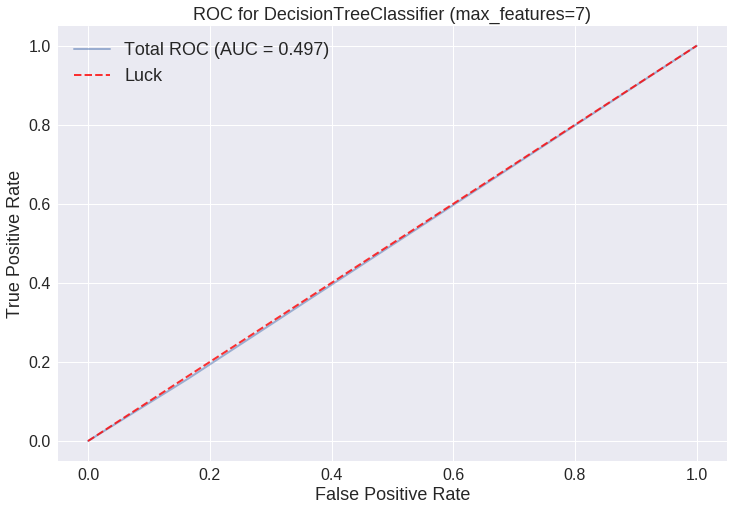

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, pred_DT_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for DecisionTreeClassifier (max_features=7)', fontsize=18)
plt.show()

In [28]:
# CV
print("Decision Tree Cross-Validation")
scores = cross_val_score(estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), X=X_train, y=y_train, cv=5)
print(scores.mean())

Decision Tree Cross-Validation
0.868645022697795


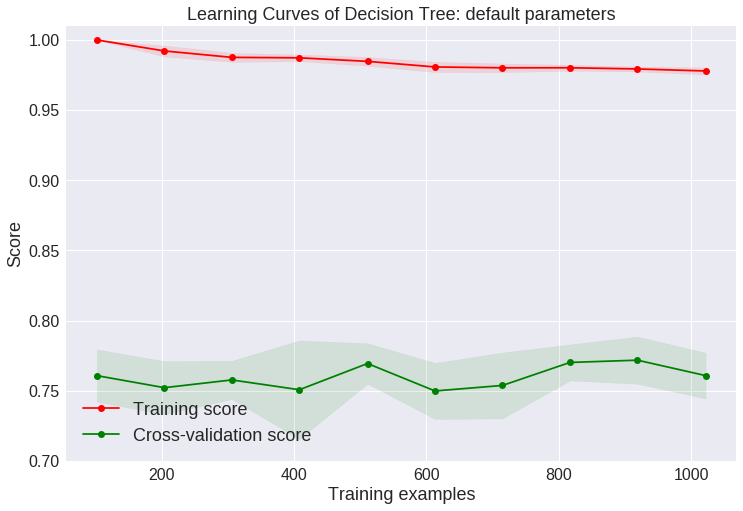

In [23]:
# Learning Curve
title = "Learning Curves of Decision Tree: default parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(DecisionTreeClassifier(random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

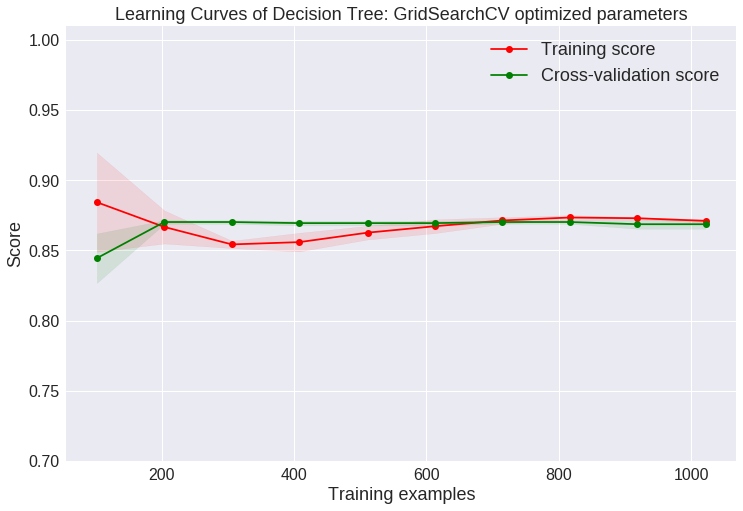

In [20]:
# Learning Curve
title = "Learning Curves of Decision Tree: GridSearchCV optimized parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

# SVM

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.86      1.00      0.93       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.8625
[[276   0]
 [ 44   0]]
(0.07900094985961914, 'seconds')


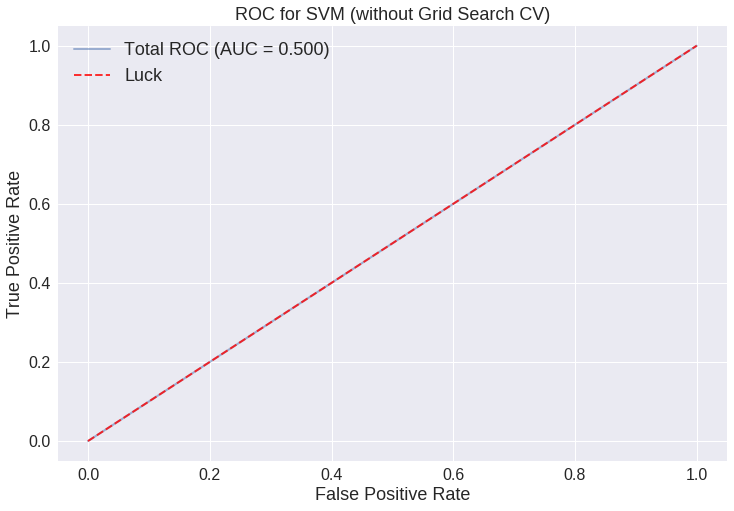

In [25]:
t0 = time.time()
svc = SVC(random_state=2019)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for SVM (without Grid Search CV)', fontsize = 18)
plt.show()

In [26]:
# all optimized

In [27]:
#Finding best parameters for our svc model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)

{'kernel': 'linear', 'C': 0.1, 'gamma': 0.1}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.00873708724975586, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


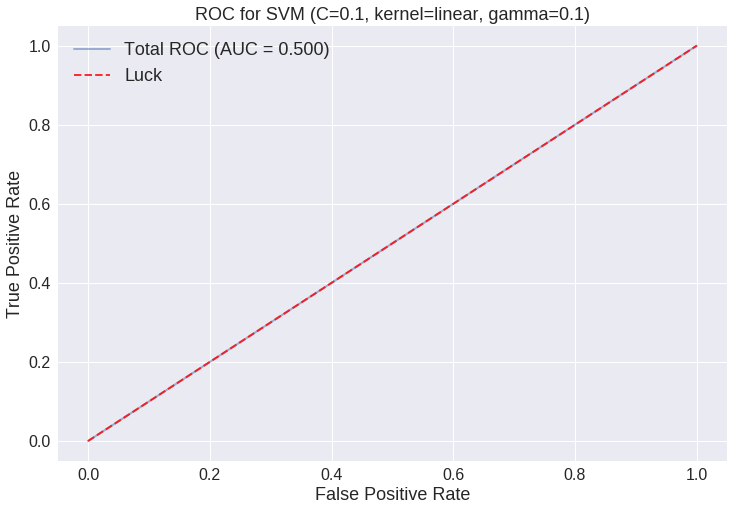

In [22]:
t0 = time.time()
#svc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
svc_optimized = SVC(C=0.1, kernel='linear', gamma=0.1, random_state=2019)
#svc_optimized = DecisionTreeClassifier(max_depth=5)
svc_optimized.fit(X_train, y_train)
pred_svc_optimized = svc_optimized.predict(X_test)
print(classification_report(y_test, pred_svc_optimized))
print(accuracy_score(y_test, pred_svc_optimized))
print(confusion_matrix(y_test, pred_svc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for SVM (C=0.1, kernel=linear, gamma=0.1)', fontsize = 18)
plt.show()

In [29]:
# kernal

In [30]:
#Finding best parameters for our svc model
param = {
    #'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf']
    #'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)

{'kernel': 'linear'}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.017529010772705078, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


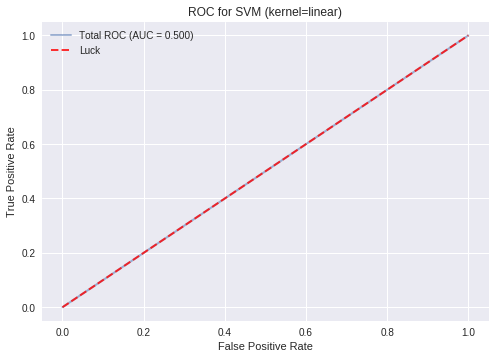

In [23]:
t0 = time.time()
#svc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
svc_optimized = SVC(kernel='linear', random_state=2019)
#svc_optimized = DecisionTreeClassifier(max_depth=5)
svc_optimized.fit(X_train, y_train)
pred_svc_optimized = svc_optimized.predict(X_test)
print(classification_report(y_test, pred_svc_optimized))
print(accuracy_score(y_test, pred_svc_optimized))
print(confusion_matrix(y_test, pred_svc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM (kernel=linear)')
plt.legend(loc="best")
plt.show()

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.061766862869262695, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


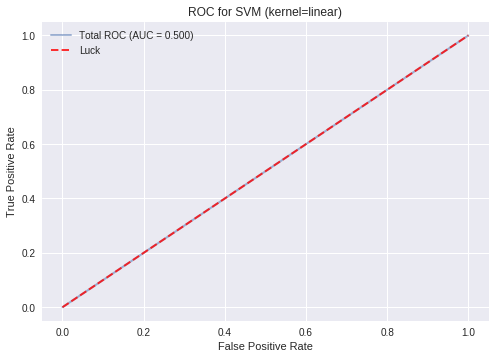

In [24]:
t0 = time.time()
#svc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
svc_optimized = SVC(kernel='rbf', random_state=2019)
#svc_optimized = DecisionTreeClassifier(max_depth=5)
svc_optimized.fit(X_train, y_train)
pred_svc_optimized = svc_optimized.predict(X_test)
print(classification_report(y_test, pred_svc_optimized))
print(accuracy_score(y_test, pred_svc_optimized))
print(confusion_matrix(y_test, pred_svc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM (kernel=linear)')
plt.legend(loc="best")
plt.show()

In [33]:
# C

In [34]:
#Finding best parameters for our svc model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
    #'kernel':['linear', 'rbf']
    #'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)

{'C': 0.1}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.040313005447387695, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


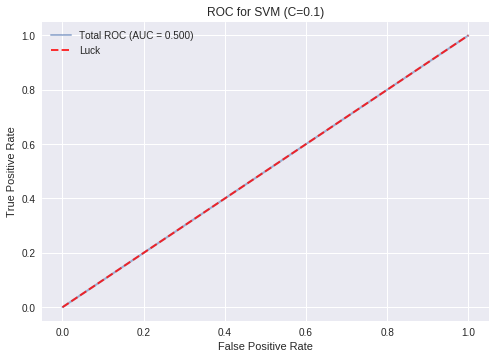

In [26]:
t0 = time.time()
#svc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
svc_optimized = SVC(C=0.1, random_state=2019)
#svc_optimized = DecisionTreeClassifier(max_depth=5)
svc_optimized.fit(X_train, y_train)
pred_svc_optimized = svc_optimized.predict(X_test)
print(classification_report(y_test, pred_svc_optimized))
print(accuracy_score(y_test, pred_svc_optimized))
print(confusion_matrix(y_test, pred_svc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM (C=0.1)')
plt.legend(loc="best")
plt.show()

In [36]:
# gamma

In [37]:
#Finding best parameters for our svc model
param = {
    #'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
    #'kernel':['linear', 'rbf']
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)

{'gamma': 0.1}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.04234194755554199, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


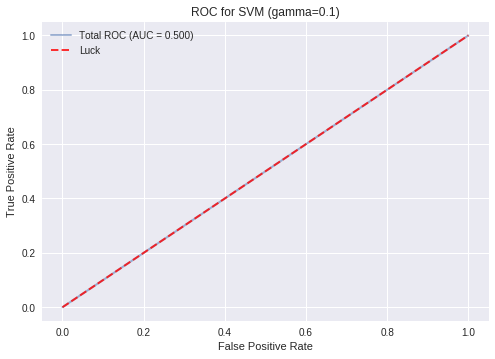

In [27]:
t0 = time.time()
#svc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
svc_optimized = SVC(gamma=0.1, random_state=2019)
#svc_optimized = DecisionTreeClassifier(max_depth=5)
svc_optimized.fit(X_train, y_train)
pred_svc_optimized = svc_optimized.predict(X_test)
print(classification_report(y_test, pred_svc_optimized))
print(accuracy_score(y_test, pred_svc_optimized))
print(confusion_matrix(y_test, pred_svc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_svc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM (gamma=0.1)')
plt.legend(loc="best")
plt.show()

In [29]:
# SVC
print("SVC Cross-Validation")
scores = cross_val_score(estimator=SVC(C=0.1, kernel='linear', gamma=0.1, random_state=2019), X=X_train, y=y_train, cv=5)
print(scores.mean())

SVC Cross-Validation
0.8702136501487754


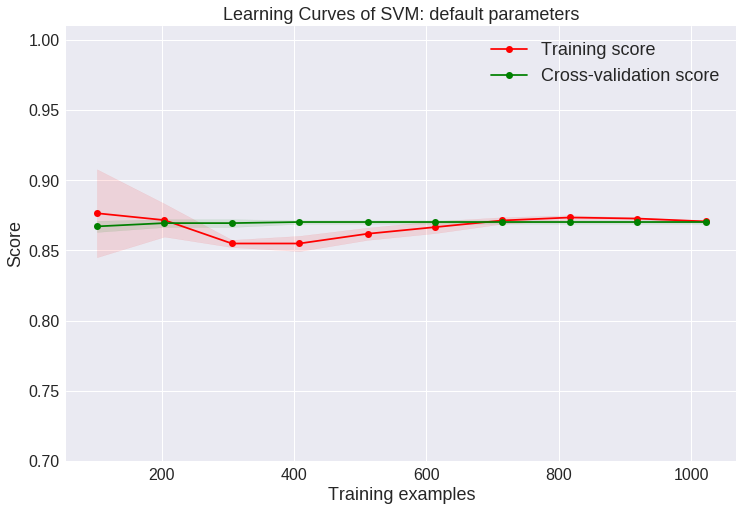

In [30]:
# Learning Curve
title = "Learning Curves of SVM: default parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(SVC(random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

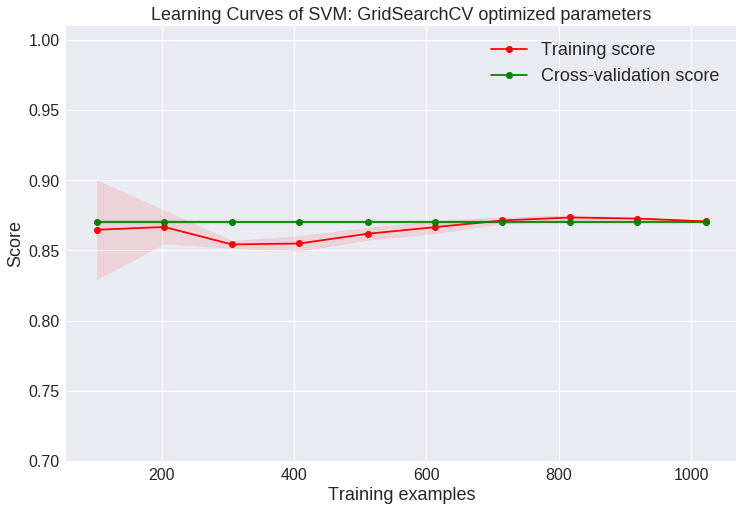

In [31]:
# Learning Curve
title = "Learning Curves of SVM: GridSearchCV optimized parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(SVC(C=0.1, kernel='linear', gamma=0.1, random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

# KNN

             precision    recall  f1-score   support

          0       0.86      0.99      0.92       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.85      0.79       320

0.85
[[272   4]
 [ 44   0]]
(0.014116048812866211, 'seconds')


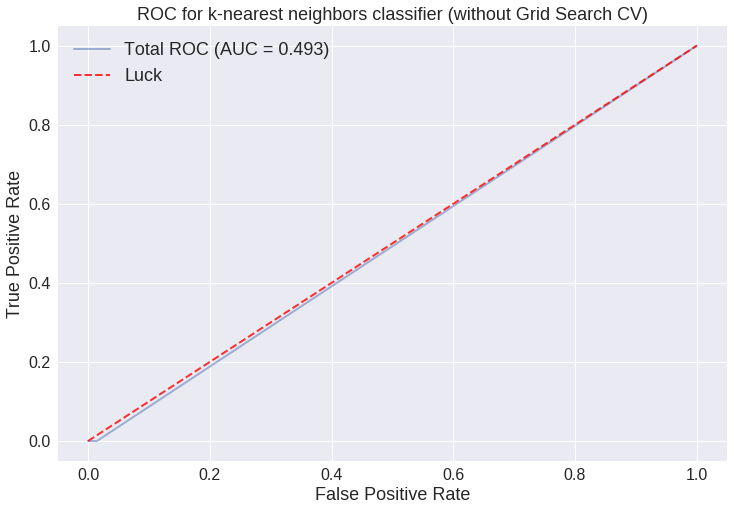

In [42]:
t0 = time.time()
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred_knc = knc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_knc))
print(accuracy_score(y_test, pred_knc))
print(confusion_matrix(y_test, pred_knc))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_knc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for k-nearest neighbors classifier (without Grid Search CV)', fontsize = 18)
plt.show()

In [43]:
#Finding best parameters for our knc model
param = {
    'n_neighbors': list(xrange(1,30)),
    'p' :[1, 2, 3, 4, 5]
}
grid_knc = GridSearchCV(KNeighborsClassifier(), param_grid=param, scoring='accuracy', cv=5)
grid_knc.fit(X_train, y_train)
print(grid_knc.best_params_)

{'n_neighbors': 8, 'p': 3}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.1521928310394287, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


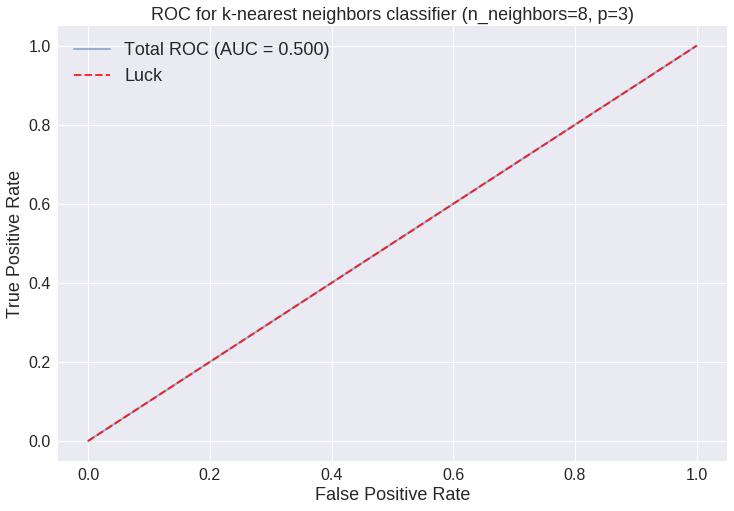

In [33]:
t0 = time.time()
#knc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
knc_optimized = KNeighborsClassifier(n_neighbors=8, p=3)
#knc_optimized = DecisionTreeClassifier(max_depth=5)
knc_optimized.fit(X_train, y_train)
pred_knc_optimized = knc_optimized.predict(X_test)
print(classification_report(y_test, pred_knc_optimized))
print(accuracy_score(y_test, pred_knc_optimized))
print(confusion_matrix(y_test, pred_knc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_knc_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for k-nearest neighbors classifier (n_neighbors=8, p=3)', fontsize = 18)
plt.show()

In [45]:
#Finding best parameters for our knc model
param = {
    'n_neighbors': list(xrange(1,30))
    #'p' :[1, 2, 3, 4, 5]
}
grid_knc = GridSearchCV(KNeighborsClassifier(), param_grid=param, scoring='accuracy', cv=5)
grid_knc.fit(X_train, y_train)
print(grid_knc.best_params_)

{'n_neighbors': 10}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.016913890838623047, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


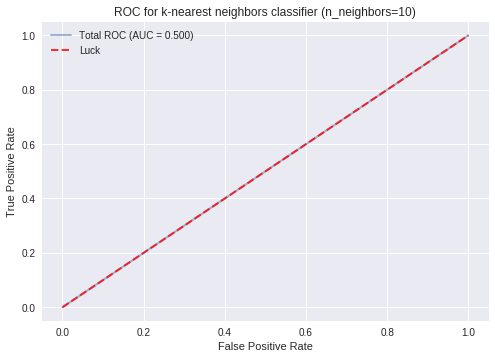

In [34]:
t0 = time.time()
#knc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
knc_optimized = KNeighborsClassifier(n_neighbors=10)
#knc_optimized = DecisionTreeClassifier(max_depth=5)
knc_optimized.fit(X_train, y_train)
pred_knc_optimized = knc_optimized.predict(X_test)
print(classification_report(y_test, pred_knc_optimized))
print(accuracy_score(y_test, pred_knc_optimized))
print(confusion_matrix(y_test, pred_knc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_knc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for k-nearest neighbors classifier (n_neighbors=10)')
plt.legend(loc="best")
plt.show()

In [47]:
#Finding best parameters for our knc model
param = {
    #'n_neighbors': list(xrange(1,30))
    'p' :[1, 2, 3, 4, 5]
}
grid_knc = GridSearchCV(KNeighborsClassifier(), param_grid=param, scoring='accuracy', cv=5)
grid_knc.fit(X_train, y_train)
print(grid_knc.best_params_)

{'p': 5}


             precision    recall  f1-score   support

          0       0.86      1.00      0.92       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.859375
[[275   1]
 [ 44   0]]
(0.16849112510681152, 'seconds')


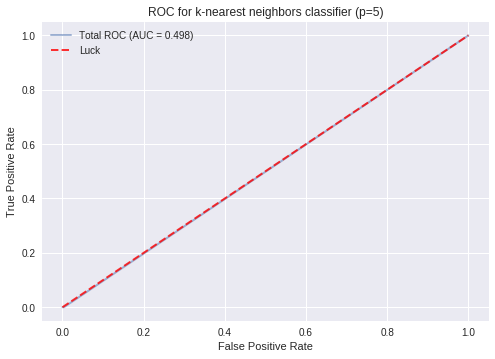

In [48]:
t0 = time.time()
#knc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
knc_optimized = KNeighborsClassifier(p=5)
#knc_optimized = DecisionTreeClassifier(max_depth=5)
knc_optimized.fit(X_train, y_train)
pred_knc_optimized = knc_optimized.predict(X_test)
print(classification_report(y_test, pred_knc_optimized))
print(accuracy_score(y_test, pred_knc_optimized))
print(confusion_matrix(y_test, pred_knc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_knc_optimized)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for k-nearest neighbors classifier (p=5)')
plt.legend(loc="best")
plt.show()

In [36]:
# KNN
print("KNN Classifier Cross-Validation")
scores = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=8, p=3), X=X_train, y=y_train, cv=5)
print(scores.mean())

KNN Classifier Cross-Validation
0.8702136501487754


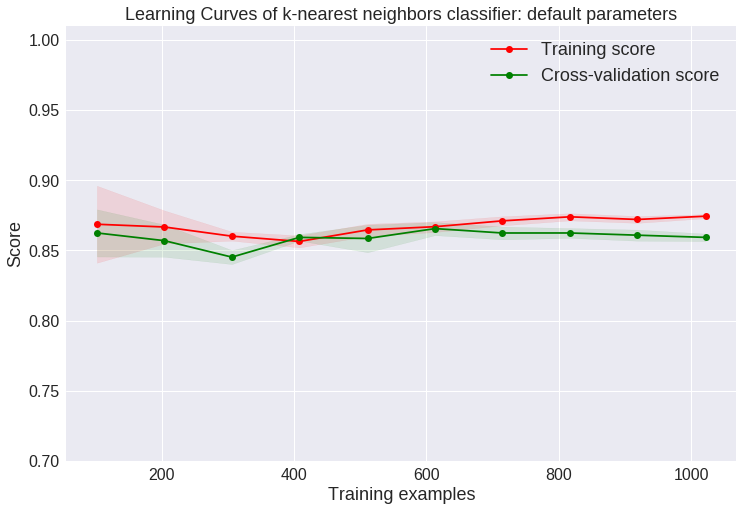

In [37]:
# Learning Curve
title = "Learning Curves of k-nearest neighbors classifier: default parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(KNeighborsClassifier(), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

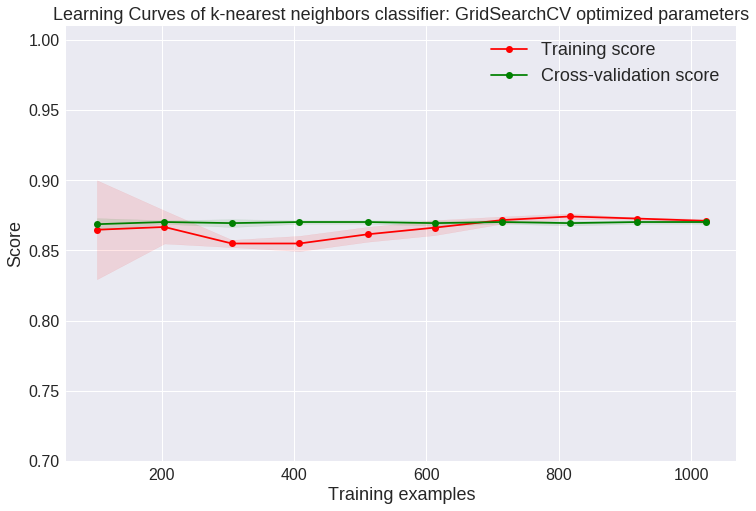

In [38]:
# Learning Curve
title = "Learning Curves of k-nearest neighbors classifier: GridSearchCV optimized parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(KNeighborsClassifier(n_neighbors=8, p=3), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

# ABC

             precision    recall  f1-score   support

          0       0.86      0.97      0.91       276
          1       0.18      0.05      0.07        44

avg / total       0.77      0.84      0.80       320

0.840625
[[267   9]
 [ 42   2]]
(0.4794750213623047, 'seconds')


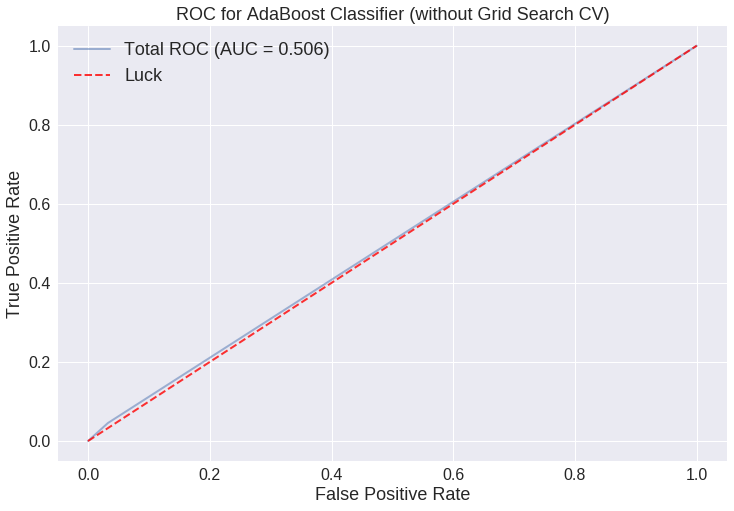

In [52]:
t0 = time.time()
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2019), random_state=2019)
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_abc))
print(accuracy_score(y_test, pred_abc))
print(confusion_matrix(y_test, pred_abc))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_abc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for AdaBoost Classifier (without Grid Search CV)', fontsize = 18)
plt.show()

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.8375
[[268   1]
 [ 51   0]]
(0.09431910514831543, 'seconds')


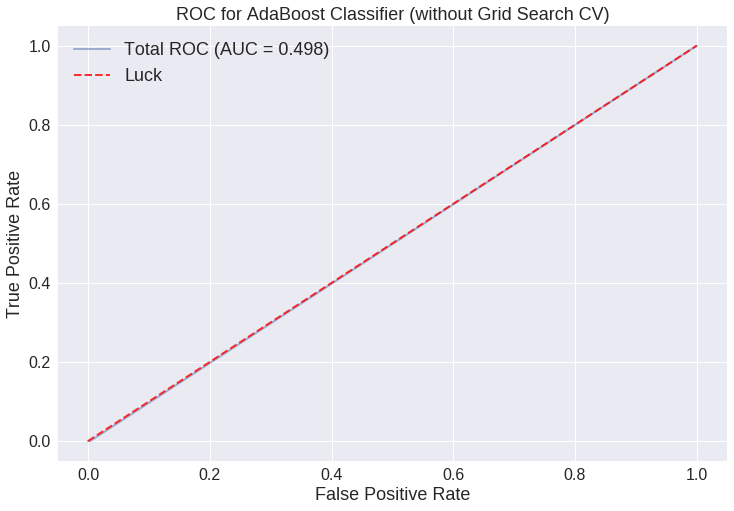

In [39]:
t0 = time.time()
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), random_state=2019)
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_abc))
print(accuracy_score(y_test, pred_abc))
print(confusion_matrix(y_test, pred_abc))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_abc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for AdaBoost Classifier (without Grid Search CV)', fontsize = 18)
plt.show()

In [40]:
#Finding best parameters for our abc model
param = {
    #'n_neighbors': list(xrange(1,30))
    #'p' :[1, 2, 3, 4, 5]
    #n_estimators=50,
    #learning_rate=1,
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100]
}
grid_abc = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_abc.fit(X_train, y_train)
print(grid_abc.best_params_)

{'n_estimators': 1}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.004444122314453125, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


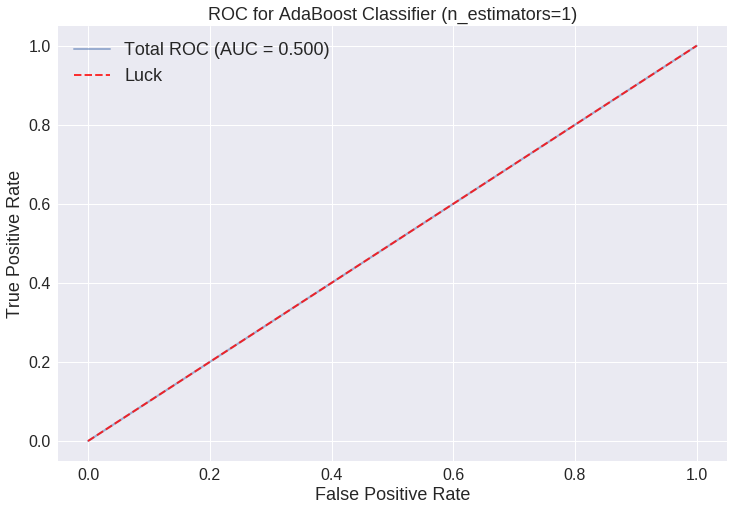

In [41]:
t0 = time.time()
#abc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
abc_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), n_estimators=1, random_state=2019)
#abc_optimized = DecisionTreeClassifier(max_depth=5)
abc_optimized.fit(X_train, y_train)
pred_abc_optimized = abc_optimized.predict(X_test)
print(classification_report(y_test, pred_abc_optimized))
print(accuracy_score(y_test, pred_abc_optimized))
print(confusion_matrix(y_test, pred_abc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_abc_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for AdaBoost Classifier (n_estimators=1)', fontsize = 18)
plt.show()

In [42]:
#Finding best parameters for our abc model
param = {
    #'n_neighbors': list(xrange(1,30))
    #'p' :[1, 2, 3, 4, 5]
    #n_estimators=50,
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    #'n_estimators': [1,10,20,30,40,50,60,70,80,90,100]
}
grid_abc = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_abc.fit(X_train, y_train)
print(grid_abc.best_params_)

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:166: RuntimeWarning: invalid value encountered in divide
  sample_weight /= sample_weight_sum
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages

{'learning_rate': 0.01}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.10317492485046387, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


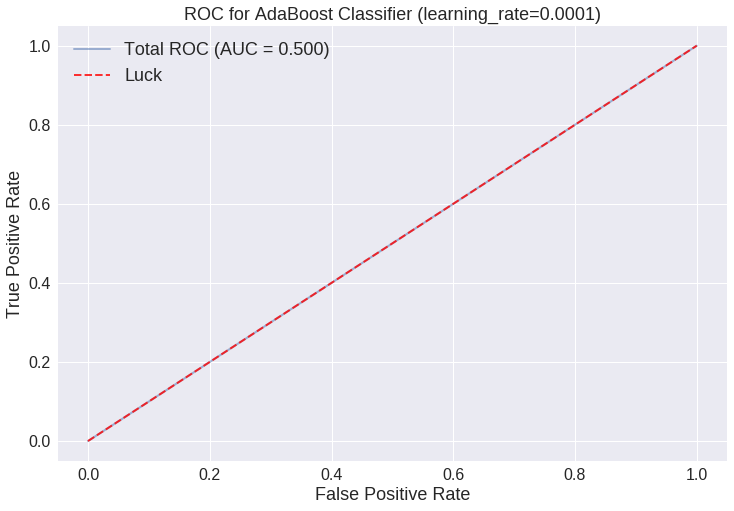

In [43]:
t0 = time.time()
#abc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
abc_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), learning_rate=0.01, random_state=2019)
#abc_optimized = DecisionTreeClassifier(max_depth=5)
abc_optimized.fit(X_train, y_train)
pred_abc_optimized = abc_optimized.predict(X_test)
print(classification_report(y_test, pred_abc_optimized))
print(accuracy_score(y_test, pred_abc_optimized))
print(confusion_matrix(y_test, pred_abc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_abc_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for AdaBoost Classifier (learning_rate=0.0001)', fontsize = 18)
plt.show()

In [44]:
#Finding best parameters for our abc model
param = {
    #'n_neighbors': list(xrange(1,30))
    #'p' :[1, 2, 3, 4, 5]
    #n_estimators=50,
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100]
}
grid_abc = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_abc.fit(X_train, y_train)
print(grid_abc.best_params_)

{'n_estimators': 40, 'learning_rate': 0.01}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.07954716682434082, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


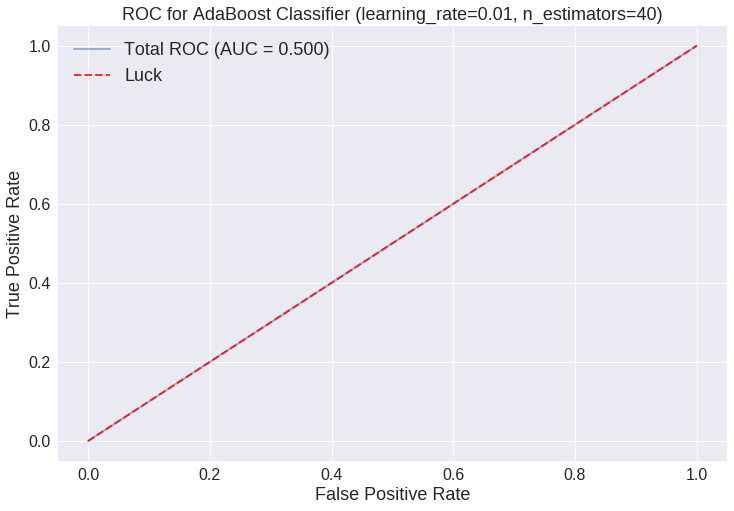

In [47]:
t0 = time.time()
#abc_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
abc_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), n_estimators=40, learning_rate=0.01, random_state=2019)
#abc_optimized = DecisionTreeClassifier(max_depth=5)
abc_optimized.fit(X_train, y_train)
pred_abc_optimized = abc_optimized.predict(X_test)
print(classification_report(y_test, pred_abc_optimized))
print(accuracy_score(y_test, pred_abc_optimized))
print(confusion_matrix(y_test, pred_abc_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_abc_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for AdaBoost Classifier (learning_rate=0.01, n_estimators=40)', fontsize = 18)
plt.show()

In [49]:
# ABC
print("AdaBoost Classifier Cross-Validation")
scores = cross_val_score(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), n_estimators=40, learning_rate=0.01,random_state=2019), X=X_train, y=y_train, cv=5)
print(scores.mean())

AdaBoost Classifier Cross-Validation
0.8702136501487754


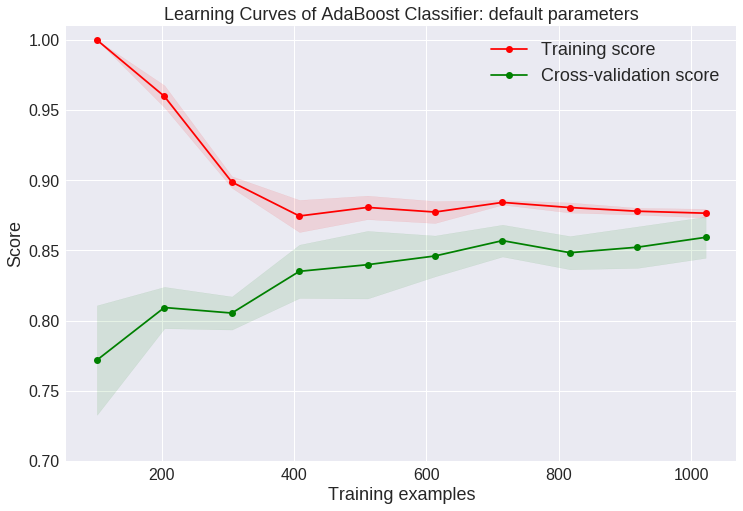

In [50]:
# Learning Curve
title = "Learning Curves of AdaBoost Classifier: default parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019),random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

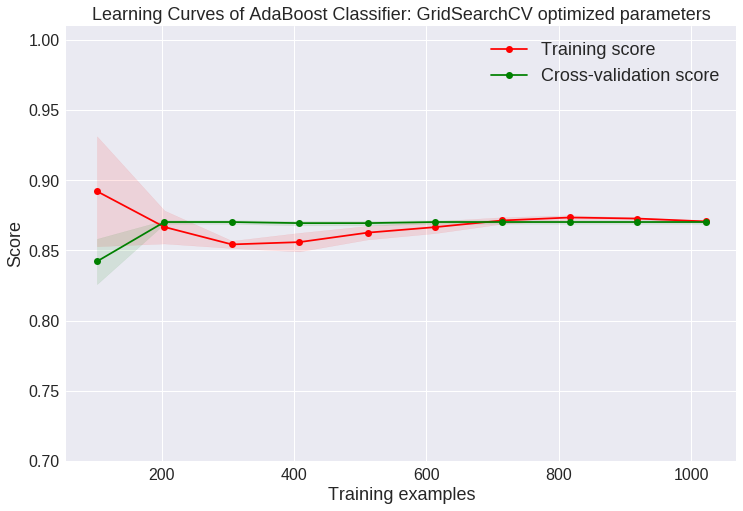

In [51]:
# Learning Curve
title = "Learning Curves of AdaBoost Classifier: GridSearchCV optimized parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1.0,random_state=2019), n_estimators=40, learning_rate=0.01,random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

# NN

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.86      1.00      0.93       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.8625
[[276   0]
 [ 44   0]]
(1.4108002185821533, 'seconds')


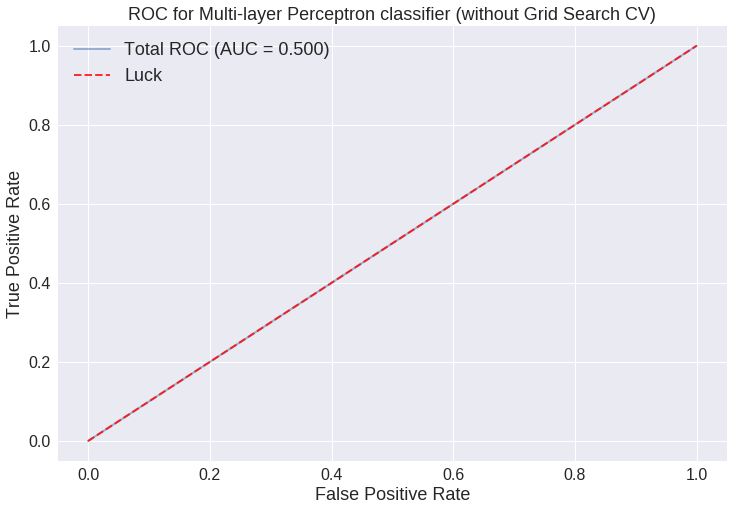

In [63]:
t0 = time.time()
mlp = MLPClassifier(random_state=2019)
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_mlp))
print(accuracy_score(y_test, pred_mlp))
print(confusion_matrix(y_test, pred_mlp))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron classifier (without Grid Search CV)', fontsize = 18)
plt.show()

In [64]:
#Finding best parameters for our mlp model
param = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

{'activation': 'logistic'}


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.86      1.00      0.93       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.8625
[[276   0]
 [ 44   0]]
(0.17050909996032715, 'seconds')


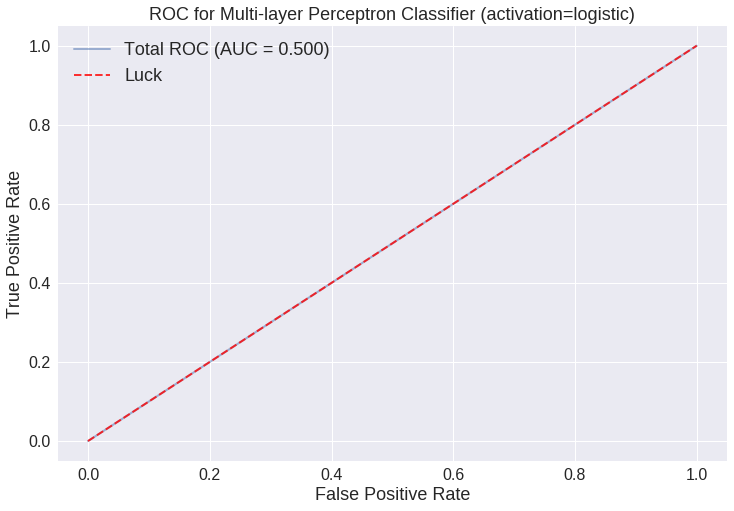

In [65]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(activation='logistic',random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier (activation=logistic)', fontsize = 18)
plt.show()

In [66]:
#Finding best parameters for our mlp model
param = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
    'solver': ['lbfgs', 'sgd', 'adam']
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

{'solver': 'sgd'}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.3598639965057373, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


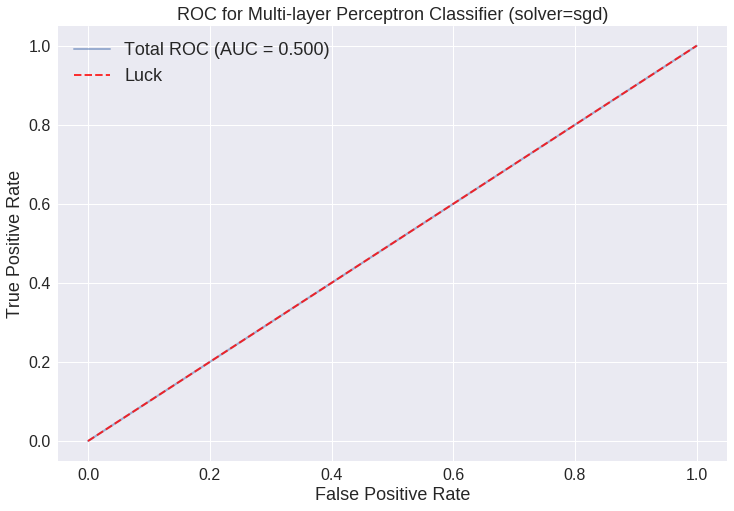

In [52]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(solver='sgd',random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier (solver=sgd)', fontsize = 18)
plt.show()

In [68]:
#Finding best parameters for our mlp model
param = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
    #'solver': ['lbfgs', 'sgd', 'adam']
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    #'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

{'alpha': 1}


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.86      1.00      0.93       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.8625
[[276   0]
 [ 44   0]]
(0.8334178924560547, 'seconds')


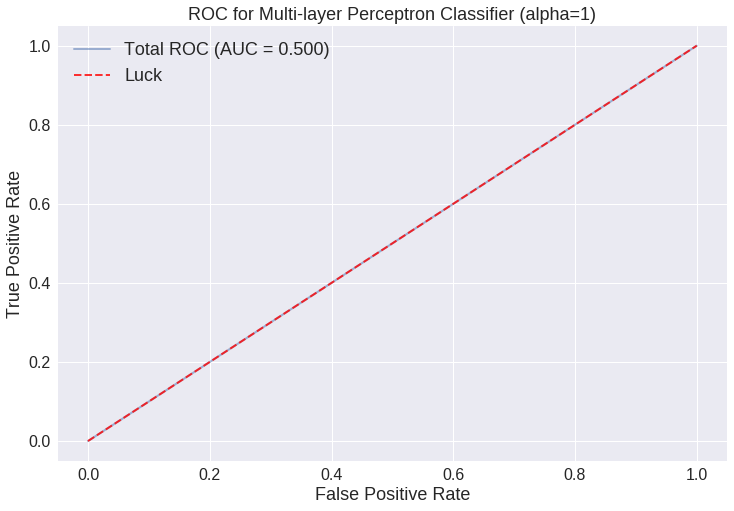

In [69]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(alpha=1,random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier (alpha=1)', fontsize = 18)
plt.show()

In [70]:
#Finding best parameters for our mlp model
param = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
    #'solver': ['lbfgs', 'sgd', 'adam']
    #'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

{'learning_rate': 'constant'}


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.86      1.00      0.93       276
          1       0.00      0.00      0.00        44

avg / total       0.74      0.86      0.80       320

0.8625
[[276   0]
 [ 44   0]]
(1.890700101852417, 'seconds')


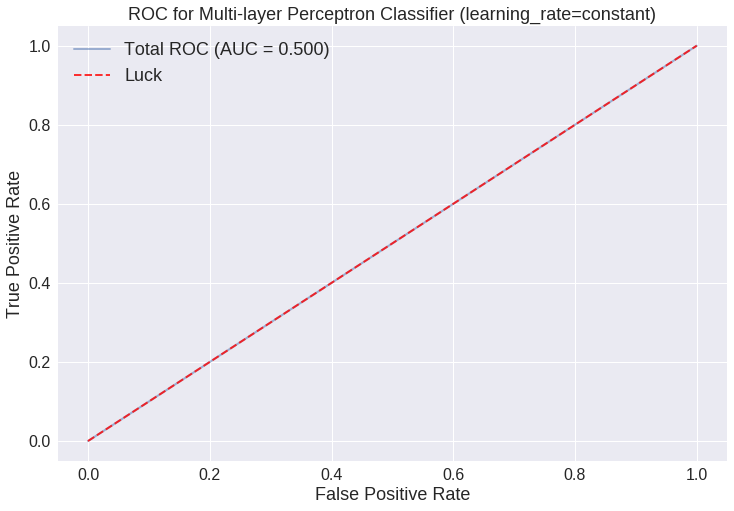

In [71]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(learning_rate='constant',random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier (learning_rate=constant)', fontsize = 18)
plt.show()

In [72]:
#Finding best parameters for our mlp model
param = {
    'hidden_layer_sizes': [(25,), (50,), (100,), (25,50), (50,100), (25,50,25), (50,50,50), (50,100,50)]
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
    #'solver': ['lbfgs', 'sgd', 'adam']
    #'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    #'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': (25,)}


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       269
          1       0.00      0.00      0.00        51

avg / total       0.71      0.84      0.77       320

0.840625
[[269   0]
 [ 51   0]]
(0.3020360469818115, 'seconds')


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


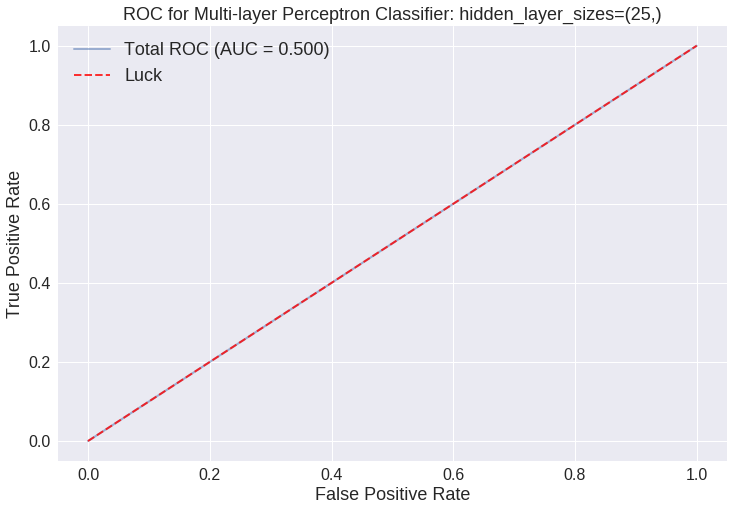

In [54]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(hidden_layer_sizes=(25,),random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier: hidden_layer_sizes=(25,)', fontsize = 18)
plt.show()

In [59]:
#Finding best parameters for our mlp model
param = {
    'hidden_layer_sizes': [(25,), (50,), (100,), (25,50), (50,100), (25,50,25), (50,50,50), (50,100,50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=2019), param_grid=param, scoring='accuracy', cv=5)
grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

{'alpha': 0.1, 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (25, 50, 25)}


             precision    recall  f1-score   support

          0       0.84      0.95      0.89       269
          1       0.12      0.04      0.06        51

avg / total       0.73      0.80      0.76       320

0.803125
[[255  14]
 [ 49   2]]
(0.5351312160491943, 'seconds')


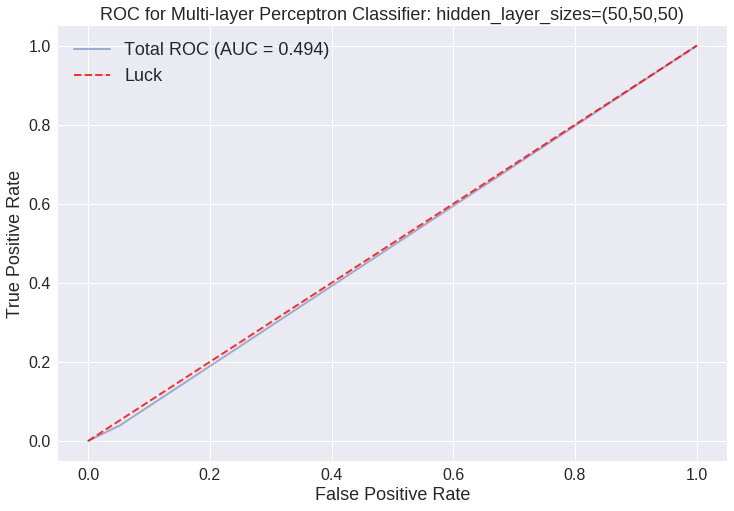

In [60]:
t0 = time.time()
#mlp_optimized = DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=0.1, min_samples_split=0.3)
mlp_optimized = MLPClassifier(hidden_layer_sizes=(25, 50, 25),alpha=0.1, activation='relu', solver='adam', learning_rate='constant',random_state=2019)
#mlp_optimized = DecisionTreeClassifier(max_depth=5)
mlp_optimized.fit(X_train, y_train)
pred_mlp_optimized = mlp_optimized.predict(X_test)
print(classification_report(y_test, pred_mlp_optimized))
print(accuracy_score(y_test, pred_mlp_optimized))
print(confusion_matrix(y_test, pred_mlp_optimized))
print(time.time() - t0, "seconds")

fpr, tpr, thresholds = roc_curve(y_test, pred_mlp_optimized)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='Total ROC (AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.legend(loc="best", fontsize = 18)
plt.title('ROC for Multi-layer Perceptron Classifier: hidden_layer_sizes=(50,50,50)', fontsize = 18)
plt.show()

In [57]:
# MLP
print("Multi-layer Perceptron Classifier Cross-Validation")
scores = cross_val_score(estimator=MLPClassifier(hidden_layer_sizes=(25,),random_state=2019), X=X_train, y=y_train, cv=5)
print(scores.mean())

Multi-layer Perceptron Classifier Cross-Validation


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8694354400320439


/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

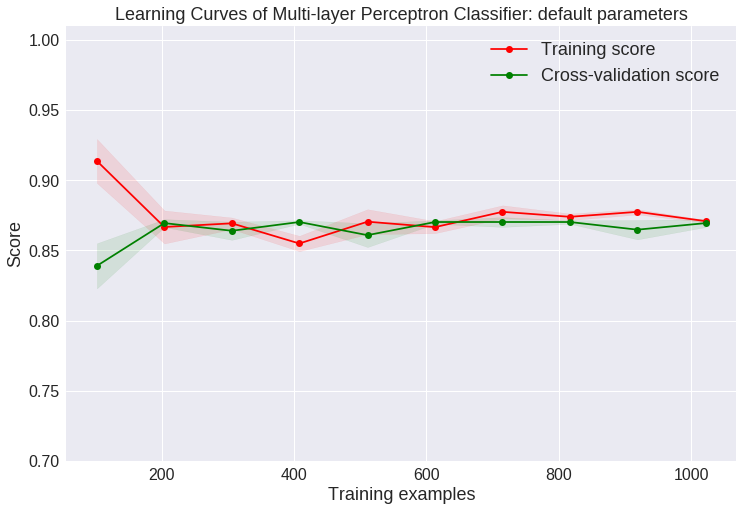

In [55]:
# Learning Curve
title = "Learning Curves of Multi-layer Perceptron Classifier: default parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(MLPClassifier(random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()

/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/media/afu/QUICK_DATA/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

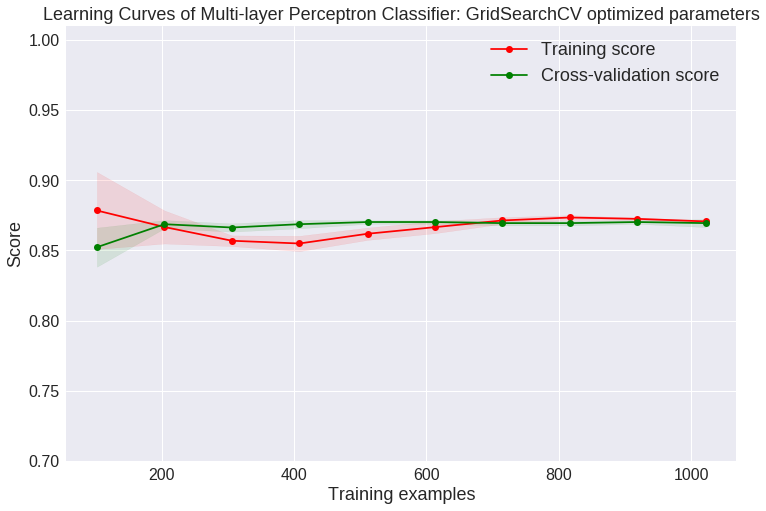

In [58]:
# Learning Curve
title = "Learning Curves of Multi-layer Perceptron Classifier: GridSearchCV optimized parameters"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=2019)
result = plot_learning_curve(MLPClassifier(hidden_layer_sizes=(25,),random_state=2019), title, X_train, y_train, ylim=(0.7, 1.01), cv=5)
result.grid(True)
result.show()